:
This dataset is aimed at predicting anaemia based on hemoglobin levels and color pixel distribution from associated images.

In [ ]:
#Predicting Anaemia from Image Pixels and Hemoglobin Levels
# anemia is a condition that occurs when your blood doesn't have enough red blood cells or hemoglobin to carry oxygen to your tissue.

color pixel distribution data obtained from related clinical imaging with hemoglobin levels. A unique instance is represented by each row in the dataset, which contains a range of attributes such clinical symptoms, medical history, and demographic data. Lower hemoglobin levels are generally indicative of anemia. Hemoglobin levels are measured in grams per deci liter (g/dL) and offer a direct association with the disorder.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/data science/project/output.csv',names=['number','sex','red_pixel','green_pixel','blue_pixel','hb','anemic'],header=0)

df.head()

,number,sex,red_pixel,green_pixel,blue_pixel,hb,anemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No


COLUMNS:

1. Number: Unique identifier for each dataset entry.
2. Sex: Gender of the individual (e.g., Male or Female).
3. %Red Pixel: Percentage of red pixels in the associated image.
4. %Green Pixel: Percentage of green pixels in the associated image.
5. %Blue Pixel: Percentage of blue pixels in the associated image.
6. Hb: Hemoglobin level measured in grams per deciliter (g/dL).
7. Anaemic: Indicator of anemia status (1 for anemic, 0 for non-anemic).

In [ ]:
df.tail()

,number,sex,red_pixel,green_pixel,blue_pixel,hb,anemic
99,100,F,49.9999,29.2860,20.7141,14.5,Yes
100,101,M,42.2324,30.6757,27.0919,6.3,Yes
101,102,F,45.6064,31.9084,22.4852,12.7,No
102,103,M,45.2095,29.2769,25.5136,13.4,No
103,104,F,43.5706,29.8094,26.6199,12.2,No


In [ ]:
df.shape

(104, 7)

In [ ]:
df.describe()

,number,red_pixel,green_pixel,blue_pixel,hb
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,45.654175,28.875507,25.470325,12.150962
std,30.166206,2.816294,1.554275,1.984671,2.512957
min,1.000000,38.796800,25.140300,19.541300,2.800000
25%,26.750000,43.911375,27.871300,24.896425,10.650000
50%,52.500000,45.385350,28.948750,25.953200,12.600000
75%,78.250000,46.968325,29.887275,26.721600,14.000000
max,104.000000,54.647800,32.368100,29.841400,16.300000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   number       104 non-null    int64  
 1   sex          104 non-null    object 
 2   red_pixel    104 non-null    float64
 3   green_pixel  104 non-null    float64
 4   blue_pixel   104 non-null    float64
 5   hb           104 non-null    float64
 6   anemic       104 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB


In [ ]:
df.isna().any()

number         False
sex            False
red_pixel      False
green_pixel    False
blue_pixel     False
hb             False
anemic         False
dtype: bool

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
labelfit = le.fit(df['sex'])
df['sex'] = labelfit.transform(df['sex'])
df.head()

,number,sex,red_pixel,green_pixel,blue_pixel,hb,anemic
0,1,2,43.2555,30.8421,25.9025,6.3,Yes
1,2,0,45.6033,28.1900,26.2067,13.5,No
2,3,1,45.0107,28.9677,26.0215,11.7,No
3,4,0,44.5398,28.9899,26.4703,13.5,No
4,5,3,43.2870,30.6972,26.0158,12.4,No


In [ ]:
labelfit = le.fit(df['anemic'])
df['anemic'] = labelfit.transform(df['anemic'])
df.head()

,number,sex,red_pixel,green_pixel,blue_pixel,hb,anemic
0,1,2,43.2555,30.8421,25.9025,6.3,1
1,2,0,45.6033,28.1900,26.2067,13.5,0
2,3,1,45.0107,28.9677,26.0215,11.7,0
3,4,0,44.5398,28.9899,26.4703,13.5,0
4,5,3,43.2870,30.6972,26.0158,12.4,0


In [ ]:
corln = df.corr()['anemic']

In [ ]:
print(corln)

number         0.053997
sex           -0.165267
red_pixel     -0.353376
green_pixel    0.566447
blue_pixel     0.057844
hb            -0.766506
anemic         1.000000
Name: anemic, dtype: float64


In [ ]:
dpl_rows = df.duplicated().sum()
print(dpl_rows)

0


In [ ]:
columns = df.columns
print(columns)

Index(['number', 'sex', 'red_pixel', 'green_pixel', 'blue_pixel', 'hb',
       'anemic'],
      dtype='object')


In [ ]:
for i in columns:
  print(df[i].value_counts(),i)
  print('\n')

number
1      1
2      1
77     1
76     1
75     1
      ..
32     1
31     1
30     1
29     1
104    1
Name: count, Length: 104, dtype: int64 number


sex
3    29
2    26
0    26
1    23
Name: count, dtype: int64 sex


red_pixel
44.1609    2
43.2555    1
45.4201    1
49.5899    1
53.9113    1
          ..
48.6358    1
44.2572    1
42.2473    1
47.8913    1
43.5706    1
Name: count, Length: 103, dtype: int64 red_pixel


green_pixel
29.5993    2
30.8421    1
29.4684    1
28.9754    1
26.3455    1
          ..
26.6982    1
29.6578    1
30.2089    1
27.0952    1
29.8094    1
Name: count, Length: 103, dtype: int64 green_pixel


blue_pixel
26.2399    2
25.9025    1
25.1115    1
21.4347    1
19.7433    1
          ..
24.6660    1
26.0850    1
27.5438    1
25.0135    1
26.6199    1
Name: count, Length: 103, dtype: int64 blue_pixel


hb
14.1    5
13.0    5
14.5    4
15.2    3
12.4    3
       ..
4.8     1
14.4    1
2.8     1
9.1     1
12.2    1
Name: count, Length: 62, dtype: int64 hb


anem

In [ ]:
for i in columns:
  print(df[i].unique(),i)
  print('\n')

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104] number


[2 0 1 3] sex


[43.2555 45.6033 45.0107 44.5398 43.287  45.0994 43.1457 43.6103 45.0423
 46.5143 45.3506 44.4062 44.9642 45.0484 46.9942 45.5842 42.5358 44.0957
 45.7104 40.9365 44.9116 43.4225 43.3019 47.6372 45.6906 43.4098 44.4252
 44.3297 47.8913 42.2473 44.2572 48.6358 42.1652 45.4434 42.1528 45.2588
 46.4081 47.2275 47.3642 46.1449 41.7122 47.9777 46.7628 44.9526 44.1868
 46.9428 48.8523 45.7581 48.5356 45.5833 45.9659 44.0418 43.9633 47.1003
 46.0477 46.2133 49.1475 45.7986 40.6395 50.3562 43.9224 45.0693 45.8483
 43.4837 38.7968 45.4201 44.1609 42.5892 

In [ ]:
df['hb'].min()

2.8

In [ ]:
df['hb'].max()

16.3

In [ ]:
df['hb'].mean()

12.150961538461537

In [ ]:
df['hb'].median()

12.6

scatter plot
1. hemoglobin levels against each color pixel perecentage .
it will help us to see if there is a linear or non linear relationship between hemoglobin levels and each of the color pixel perecentage

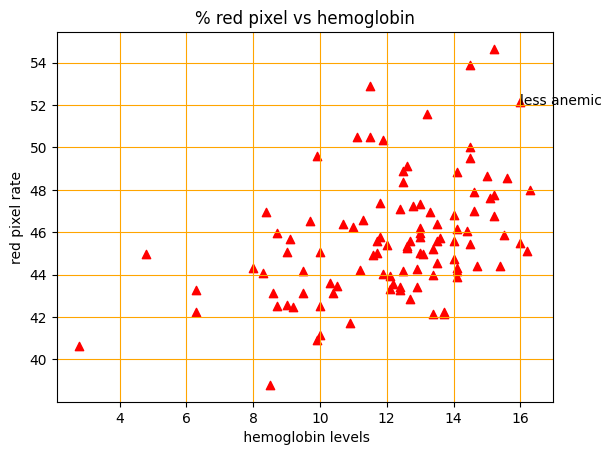

In [ ]:
import matplotlib.pyplot as plt

hemo = df.hb
red_pixel  = df.red_pixel

plt.scatter(hemo,red_pixel,marker="^",color='r')

plt.grid(True,color='orange')

plt.xlabel(' hemoglobin levels')
plt.ylabel('red pixel rate')
plt.title('% red pixel vs hemoglobin')
plt.text(x=16,y=52,s='less anemic')

plt.show()

1. there might be a correlation b/w the percentage of red pixels and hb levels
2. indicating that as the red pixel percentage increases
3. the hb level also increase

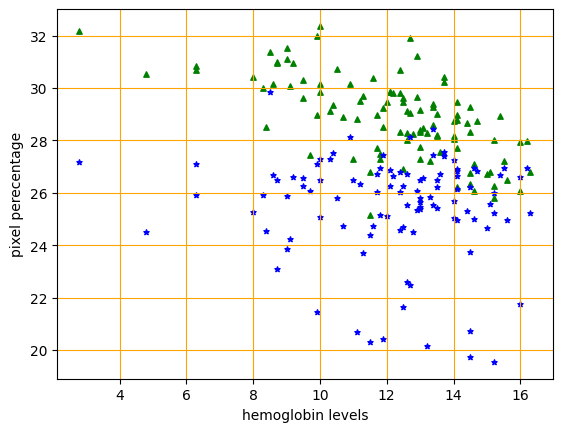

In [ ]:
import matplotlib.pyplot as plt

hemo = df.hb
green_pixel = df.green_pixel
blue_pixel = df.blue_pixel

plt.grid(True,color='orange')

plt.scatter(hemo,green_pixel,marker='^',color='g',s=15)
plt.scatter(hemo,blue_pixel,marker='*',color='b',s=15)

plt.xlabel('hemoglobin levels')
plt.ylabel('pixel perecentage')
plt.show()

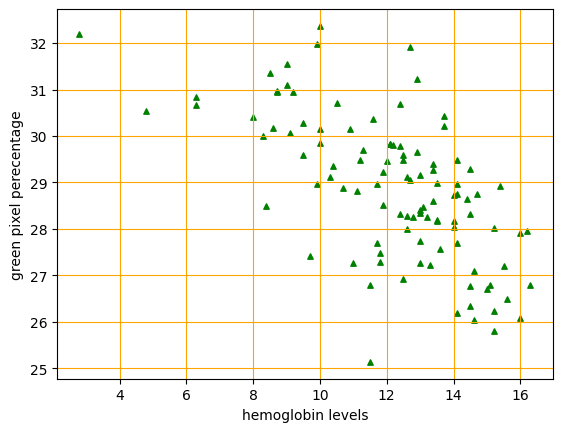

In [ ]:
import matplotlib.pyplot as plt

hemo = df.hb
green_pixel = df.green_pixel
blue_pixel = df.blue_pixel

plt.grid(True,color='orange')

plt.scatter(hemo,green_pixel,marker='^',color='g',s=15)

plt.xlabel('hemoglobin levels')
plt.ylabel('green pixel perecentage')
plt.show()

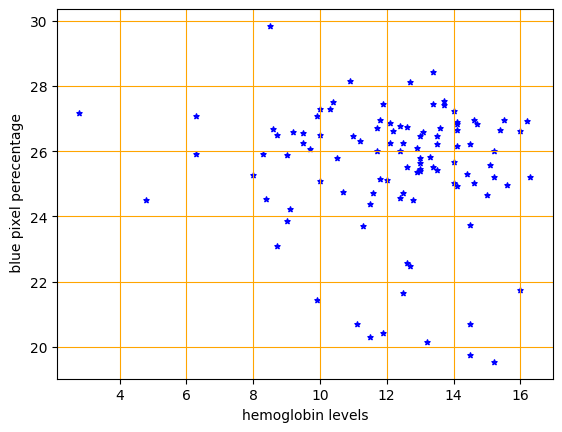

In [ ]:
hemo = df.hb
blue_pixel = df.blue_pixel

plt.grid(True,color='orange')

plt.scatter(hemo,blue_pixel,marker='*',color='b',s=15)

plt.xlabel('hemoglobin levels')
plt.ylabel(' blue pixel perecentage')
plt.show()

in this plot ,
1. green and blue pixel does not have a strong relationship between hemoglobin levels

histogram

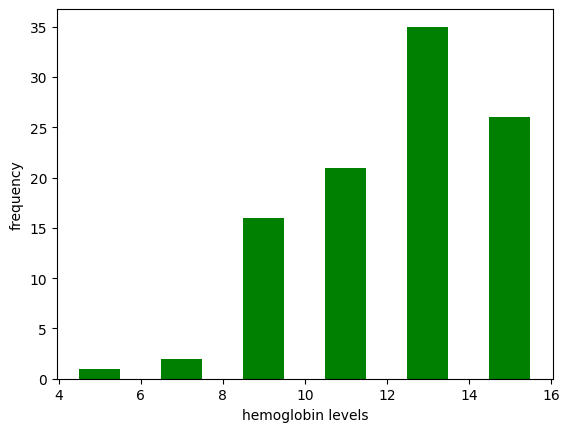

In [ ]:
import matplotlib.pyplot as plt


hemo=df.hb

plt.hist(hemo,bins=[4,6,8,10,12,14,16],color='g',rwidth=0.50)
plt.xlabel('hemoglobin levels')
plt.ylabel('frequency')
plt.show()

This histogram of hemoglobin levels shows how frequently different hemoglobin levels occur within this dataset.

here, 12 - 14 grams per deciliter (g/dL) hb is having higher frequency in this data set

lm plot


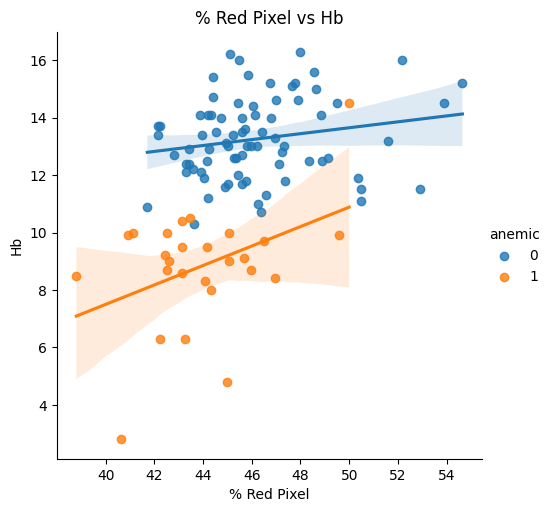

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='red_pixel', y='hb', hue='anemic', data=df)

plt.title('% Red Pixel vs Hb')
plt.xlabel('% Red Pixel')
plt.ylabel('Hb')
plt.show()

in this plot , increasing red pixel rate will also  increase  the hemoglobin level
the indivudual with higher hemoglobin level will be non - anemic

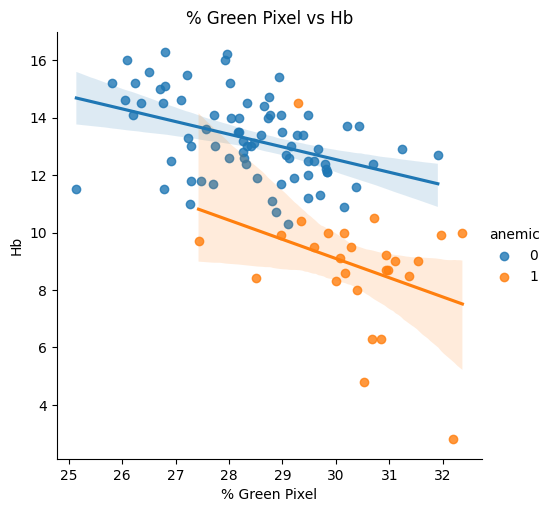

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='green_pixel', y='hb', hue='anemic', data=df)

plt.title('% Green Pixel vs Hb')
plt.xlabel('% Green Pixel')
plt.ylabel('Hb')
plt.show()

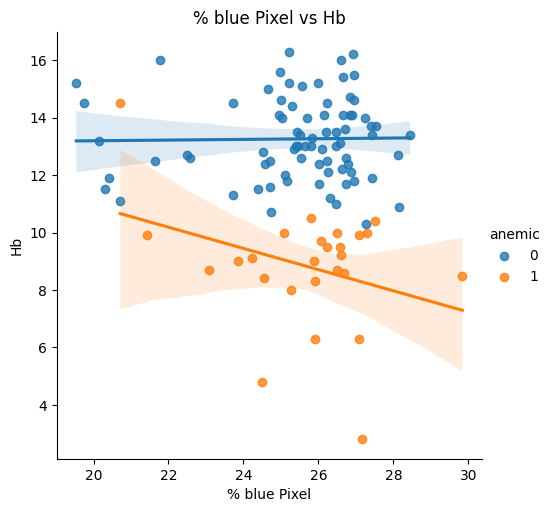

In [ ]:
sns.lmplot(x='blue_pixel', y='hb', hue='anemic', data=df)
plt.title('% blue Pixel vs Hb')
plt.xlabel('% blue Pixel')
plt.ylabel('Hb')
plt.show()

green and blue pixel does not have a strong relationship between hemoglobin levels

**box plot**
Hemoglobin  Levels for Anemic and Non-Anemic Individuals

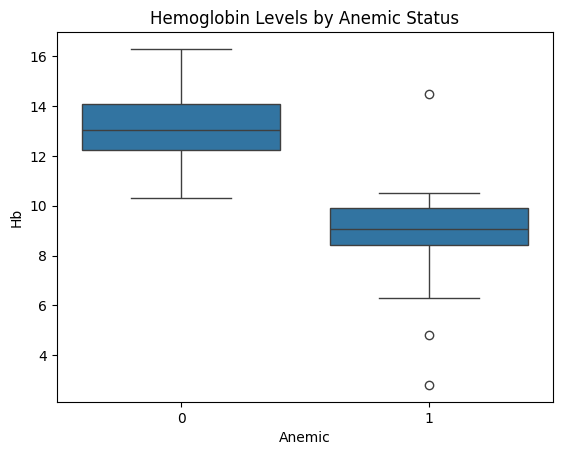

In [ ]:
sns.boxplot(x='anemic', y='hb', data=df)
plt.title('Hemoglobin Levels by Anemic Status')
plt.xlabel('Anemic')
plt.ylabel('Hb')
plt.show()

Here, This box plot show a clear separation between the Hb levels of anemic and non-anemic individuals.
Anemic individuals will generally have lower Hb levels, indicating a clear distinction between the two groups.

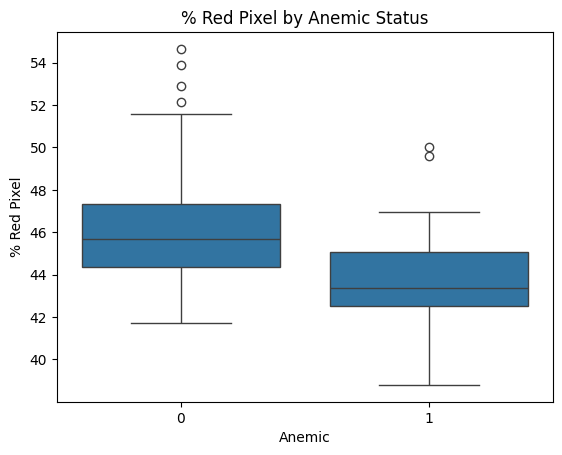

In [ ]:
sns.boxplot(x='anemic', y='red_pixel', data=df)
plt.title('% Red Pixel by Anemic Status')
plt.xlabel('Anemic')
plt.ylabel('% Red Pixel')
plt.show()

If the median and interquartile range (IQR) of the red pixel percentage for non-anemic individuals are higher compared to anemic individuals, it suggests that a higher percentage of red pixels might be associated with higher Hb levels. This could indicate that the red pixel percentage is a potential marker for non-anemia.



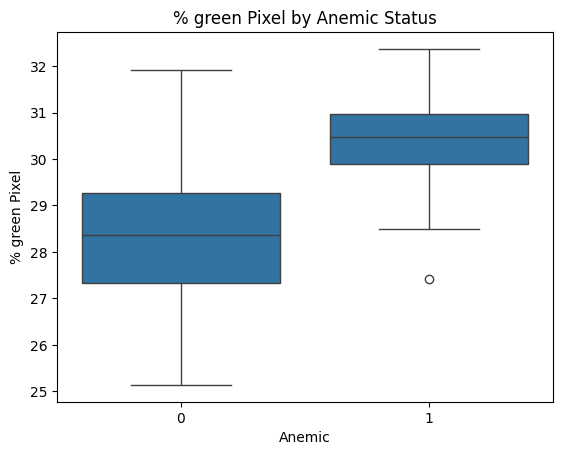

In [ ]:
sns.boxplot(x='anemic', y='green_pixel', data=df)
plt.title('% green Pixel by Anemic Status')
plt.xlabel('Anemic')
plt.ylabel('% green Pixel')
plt.show()

the person have anemia shows higher amount green pixel , rather than non anemic individuals


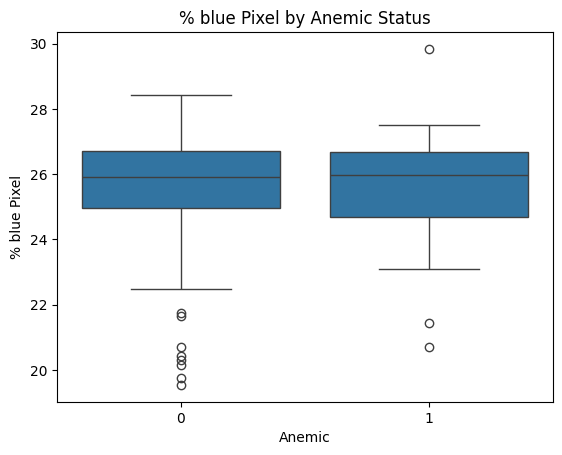

In [ ]:
sns.boxplot(x='anemic', y='blue_pixel', data=df)
plt.title('% blue Pixel by Anemic Status')
plt.xlabel('Anemic')
plt.ylabel('% blue Pixel')
plt.show()

Similar to the green pixel percentage, if the median and IQR do not show significant differences, it suggests that the blue pixel percentage is also not a reliable indicator for anemia status.

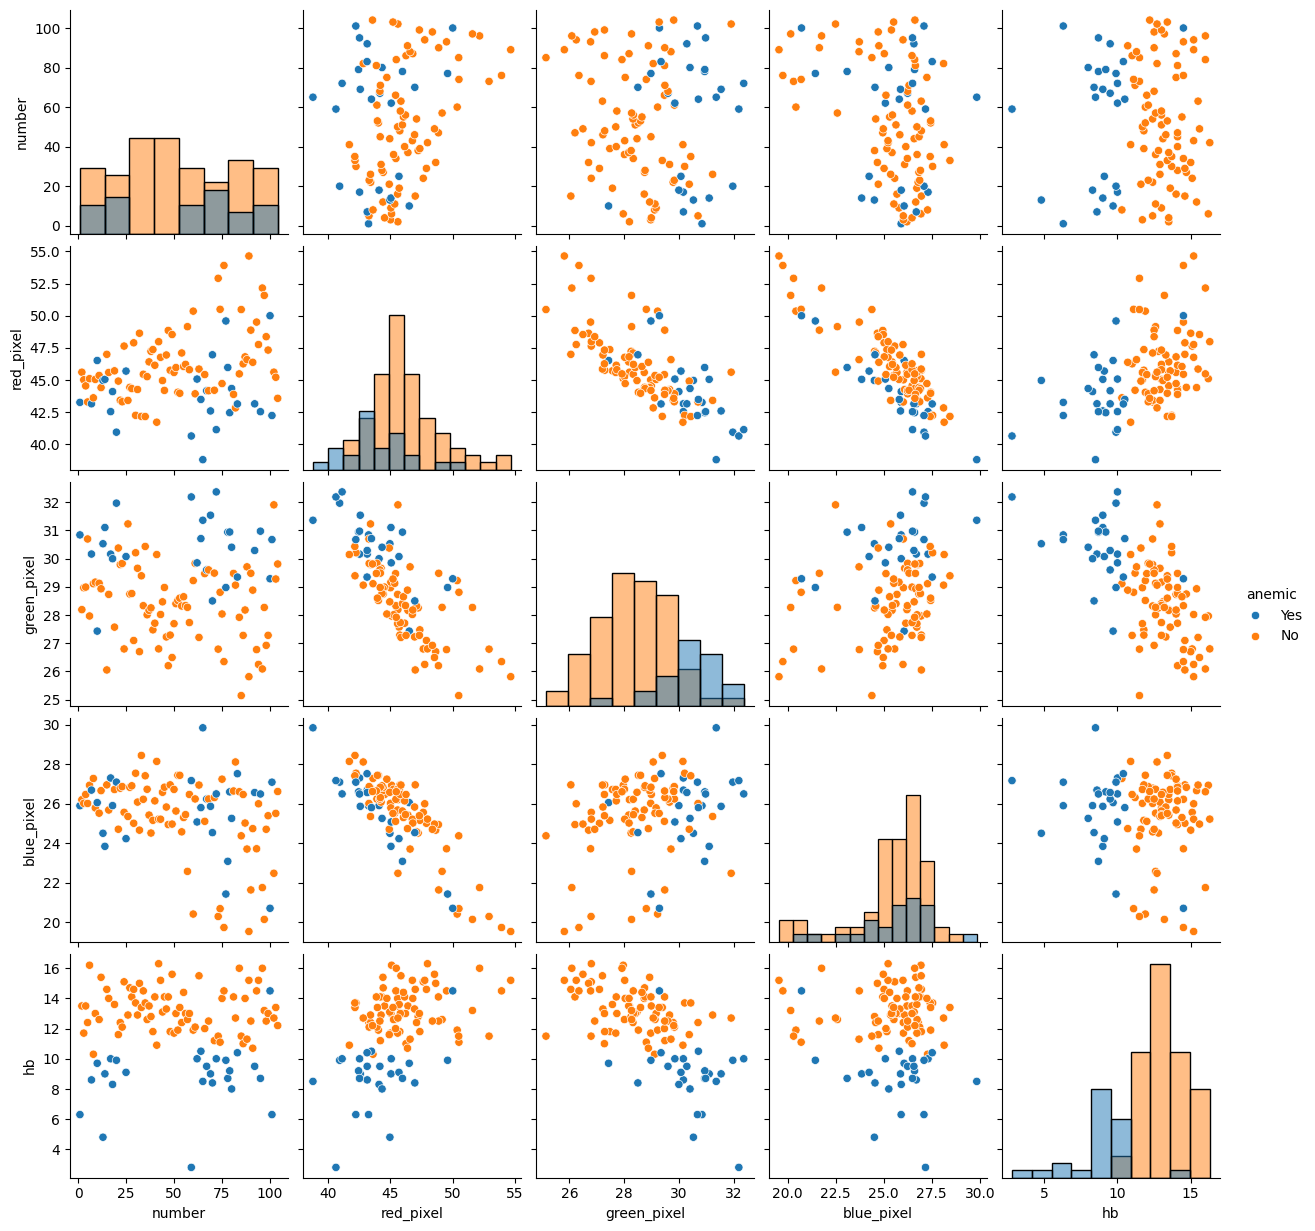

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df,hue='anemic',diag_kind='hist')
plt.show()

heatmap

A heatmap provides a visual representation of data where individual values are represented by colors.
When applied to the anemic dataset, a heatmap can show correlations between different columns

               number       sex  red_pixel  green_pixel  blue_pixel        hb  \
number       1.000000  0.138819   0.286166    -0.077089   -0.345707 -0.019768   
sex          0.138819  1.000000   0.098272    -0.170702   -0.005766  0.184634   
red_pixel    0.286166  0.098272   1.000000    -0.732003   -0.845764  0.424586   
green_pixel -0.077089 -0.170702  -0.732003     1.000000    0.255589 -0.637340   
blue_pixel  -0.345707 -0.005766  -0.845764     0.255589    1.000000 -0.103373   
hb          -0.019768  0.184634   0.424586    -0.637340   -0.103373  1.000000   
anemic       0.053997 -0.165267  -0.353376     0.566447    0.057844 -0.766506   

               anemic  
number       0.053997  
sex         -0.165267  
red_pixel   -0.353376  
green_pixel  0.566447  
blue_pixel   0.057844  
hb          -0.766506  
anemic       1.000000  


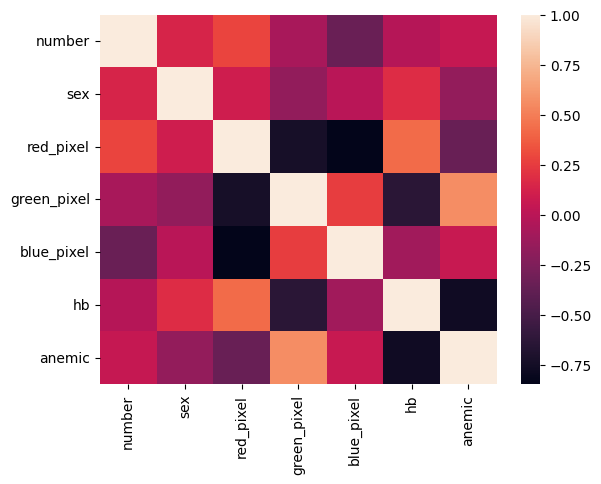

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df.corr())

sns.heatmap(df.corr())
plt.show()

Hemoglobin Levels and Anemia Status: There is a strong negative correlation between hemoglobin levels and anemia status. This means lower hemoglobin levels are associated with a higher likelihood of being anemic.

Red Pixel Percentage and Hemoglobin Levels:

There is a moderate positive correlation between the percentage of red pixels and hemoglobin levels. This suggests that higher percentages of red pixels are associated with higher hemoglobin levels.

Green and Blue Pixel Percentages:

There are weak or no significant correlations between the percentages of green and blue pixels and hemoglobin levels. These color metrics do not appear to be reliable indicators of hemoglobin levels or anemia status.

Sex and Hemoglobin Levels:

There might be a weak correlation between sex and hemoglobin levels, with males potentially having slightly higher hemoglobin levels on average compared to females. However, this relationship may not be strong or significant.



Hemoglobin levels  are the primary indicator of anemia in this dataset.

The percentage of red pixels in the blood samples tends to be higher in individuals with normal hemoglobin levels, while those with lower hemoglobin levels (indicative of anemia) show a higher percentage of green and blue pixels

Individuals with a higher percentage of green and blue pixels in their blood sample images are at a higher risk of being anemic